In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Quincke's Method

## Calibration

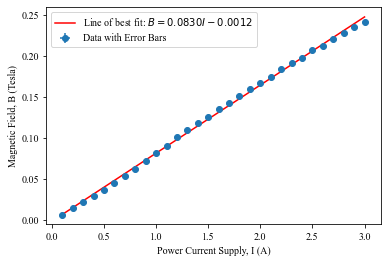

0.08298998887652946 0.0005996353936112454 -0.0012344827586206475 0.001064528758471758


In [2]:
supply_current = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3])  # amperes
mag_F_g = 10*np.array([7,15,22,29,37,45,54,63,72,82,91,102,110,118,126,135,143,151,160,167,174,184,192,198,207,212,221,228,235,242])
mag_F_T = np.abs(mag_F_g) / 1e4

m, c = np.polyfit(supply_current, mag_F_T, 1)

mag_F_T_2 = [m * i + c for i in supply_current]
plt.errorbar(supply_current, mag_F_T, xerr= 0.01, yerr=1e-4, fmt='o', label='Data with Error Bars') #errors are the least counts of the devices
plt.plot(supply_current, mag_F_T_2, 'r', label=f'Line of best fit: $B = {m:.4f}I  {c:.4f}$')
plt.xlabel('Power Current Supply, I (A)')
plt.ylabel('Magnetic Field, B (Tesla)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Magnetic Susceptibility/calib_Q.pdf", dpi = 300,
            bbox_inches="tight",
            transparent=True)
plt.show()
slope, intercept, r, p, se = linregress(supply_current, mag_F_T)
result = linregress(supply_current, mag_F_T)
print(result.slope, result.stderr, result.intercept, result.intercept_stderr)

## Calculation

In [25]:
def analyze_data_Q(mag, del_h, rho, N):
    mu_0 = 4 * np.pi * 1e-7
    g = 9.81
    del_h = del_h / 1000
    rho_air = 1.225
    m, c = np.polyfit(mag**2, del_h, 1)
    del_h_2 = [m * i + c for i in mag**2]

    # Plot the data and the line of best fit
    plt.errorbar(mag**2, del_h, xerr=1e-12, yerr=0.00158, fmt='o', label='Data with Error Bars')
    plt.plot(mag**2, del_h_2, 'r', label=f'Line of best fit: $\Delta h = {m:.2e}B^2 + {c:.2e}$')
    plt.xlabel('Squared Magnetic Field, B$^2$ (Tesla$^2$)')
    plt.ylabel('Change in height, $\Delta h$ (m)')
    plt.legend()
    plt.savefig(f"D:/Semester 5/Lab 4/Magnetic Susceptibility/{N}.pdf", dpi=300, bbox_inches="tight", transparent=True)
    plt.show()

    chi = (m * 2 * mu_0 * (rho-rho_air)* g) 
    
    print(f"Chi Value: {chi:.4e}")

    result = linregress(mag, del_h)
    
    slope_sci = "{:e}".format(result.slope)
    slope_stderr_sci = "{:e}".format(result.stderr)
    intercept_sci = "{:e}".format(result.intercept)
    intercept_stderr_sci = "{:e}".format(result.intercept_stderr)
    
    print(f"Slope: {slope_sci}")
    print(f"Slope Standard Error: {slope_stderr_sci}")
    print(f"Intercept: {intercept_sci}")
    print(f"Intercept Standard Error: {intercept_stderr_sci}")

### FeCl3

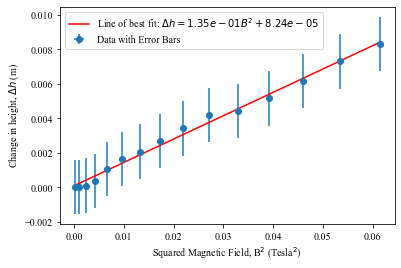

Chi Value: 5.3370e-03
Slope: 3.611446e-02
Slope Standard Error: 1.962631e-03
Intercept: -1.628913e-03
Intercept Standard Error: 2.940965e-04


In [26]:
mag = np.array([0.01537,0.03197,0.04857,0.06517,0.08177,0.09837,0.11497,0.13157,0.14817,0.16477,0.18137,0.19797,0.21457,0.23117,0.24777])  
del_h = np.array([0,0,0.1,0.36,1.07,1.64,2.07,2.67,3.41,4.18,4.43,5.15,6.16,7.3,8.3])
analyze_data_Q(mag, del_h, 1600, 'FeCl_3') 

### MnSO4

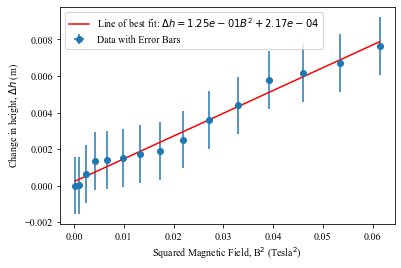

Chi Value: 4.9162e-03
Slope: 3.294603e-02
Slope Standard Error: 2.426060e-03
Intercept: -1.317199e-03
Intercept Standard Error: 3.636289e-04


In [27]:
mag = np.array([0.01537,0.03197,0.04857,0.06517,0.08177,0.0992,0.11497,0.13157,0.14817,0.16477,0.18137,0.19797,0.21457,0.23117,0.24777])  
del_h = np.array([0,0.01,0.63,1.34,1.39,1.52,1.72,1.89,2.52,3.58,4.39,5.78,6.15,6.71,7.66])
analyze_data_Q(mag, del_h, 1600, 'MnSO_4') 

In [24]:
data = [3.611446e-02,3.294603e-02]
a = np.std(data)
a

0.001584215

# Gouy's Method

## Calibration

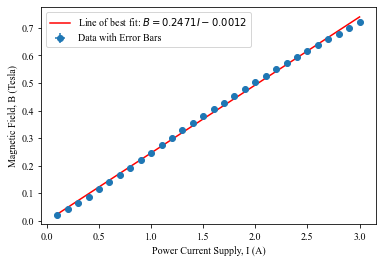

0.2470545050055617 0.0018439899978842317 -0.001234482758620592 0.0032736232784062055


In [8]:
supply_current = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3])  # amperes
mag_F_g = 10*np.array([22,43,65,87,114,140,166,191,219,247,276,300,328,353,379,405,429,454,478,503,525,549,571,596,616,637,658,679,700,721])
mag_F_T = np.abs(mag_F_g) / 1e4

m, c = np.polyfit(supply_current, mag_F_T, 1)

mag_F_T_2 = [m * i + c for i in supply_current]
plt.errorbar(supply_current, mag_F_T, xerr= 0.01, yerr=1e-4, fmt='o', label='Data with Error Bars') #errors are the least counts of the devices
plt.plot(supply_current, mag_F_T_2, 'r', label=f'Line of best fit: $B = {m:.4f}I  {c:.4f}$')
plt.xlabel('Power Current Supply, I (A)')
plt.ylabel('Magnetic Field, B (Tesla)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Magnetic Susceptibility/calib_G.pdf", dpi = 300,
            bbox_inches="tight",
            transparent=True)
plt.show()
slope, intercept, r, p, se = linregress(supply_current, mag_F_T)
result = linregress(supply_current, mag_F_T)
print(result.slope, result.stderr, result.intercept, result.intercept_stderr)

## Calculation

In [22]:
def analyze_data_G(mag, del_m, r, N):
    mu_0 = 4 * np.pi * 1e-7
    g = 9.81
    del_m = del_m / 1000
    r = r/1000
    m, c = np.polyfit(mag**2, del_m, 1)
    del_m_2 = [m * i + c for i in mag**2]

    # Plot the data and the line of best fit
    plt.errorbar(mag**2, del_m, xerr=1e-12, yerr=1e-7, fmt='o', label='Data with Error Bars')
    plt.plot(mag**2, del_m_2, 'r', label=f'Line of best fit: $\Delta m = {m:.2e}B^2 + {c:.2e}$')
    plt.xlabel('Squared Magnetic Field, B$^2$ (Tesla$^2$)')
    plt.ylabel('Change in mass, $\Delta m$ (kg)')
    plt.legend()
    plt.savefig(f"D:/Semester 5/Lab 4/Magnetic Susceptibility/mass_{N}.pdf", dpi=300, bbox_inches="tight", transparent=True)
    plt.show()

    chi = (m * 2 * mu_0 * g) / (np.pi * (r**2))

    print(f"Chi Value: {chi:.4e}")

    result = linregress(mag, del_m)
    
    #d_chi = chi*(np.sqrt(((result.stderr/result.slope)**2) + (2*(0.02/r)**2)))
    #rel_e = (d_chi*100/chi)
    
    slope_sci = "{:e}".format(result.slope)
    slope_stderr_sci = "{:e}".format(result.stderr)
    intercept_sci = "{:e}".format(result.intercept)
    intercept_stderr_sci = "{:e}".format(result.intercept_stderr)

    #print(f"Delta Chi: {d_chi}")
    #print(f"Relative Percentage error: {rel_e}")
    print(f"Slope: {slope_sci}")
    print(f"Slope Standard Error: {slope_stderr_sci}")
    print(f"Intercept: {intercept_sci}")
    print(f"Intercept Standard Error: {intercept_stderr_sci}")

### Mass 1

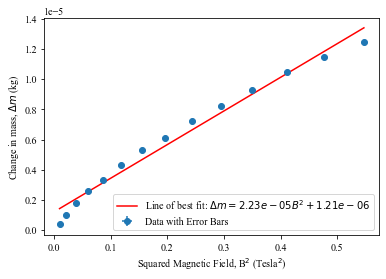

Chi Value: 1.6981e-05
Slope: 1.921965e-05
Slope Standard Error: 4.023818e-07
Intercept: -2.046690e-06
Intercept Standard Error: 1.865509e-07


In [23]:
mag = np.array([0.09757,0.14697,0.19637,0.24577,0.29517,0.34457,0.39397,0.44337,0.49277,0.54217,0.59157,0.64097,0.69037,0.73977])  
del_m = np.array([0.0004,0.001,0.0018,0.0026,0.0033,0.0043,0.0053,0.0061,0.0072,0.0082,0.0093,0.0105,0.0115,0.0125])
analyze_data_G(mag, del_m, 3.21, 1)

### Mass 2

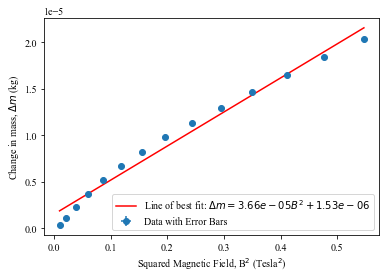

Chi Value: 1.7613e-05
Slope: 3.154336e-05
Slope Standard Error: 7.020156e-07
Intercept: -3.806257e-06
Intercept Standard Error: 3.254662e-07


In [14]:
mag = np.array([0.09757,0.14697,0.19637,0.24577,0.29517,0.34457,0.39397,0.44337,0.49277,0.54217,0.59157,0.64097,0.69037,0.73977])  
del_m = np.array([0.0004,0.0011,0.0023,0.0037,0.0052,0.0067,0.0082,0.0098,0.0113,0.0129,0.0147,0.0165,0.0184,0.0204])
analyze_data_G(mag, del_m, 4.04, 2)

### Mass 3

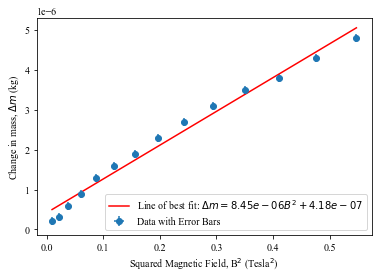

Chi Value: 1.6755e-05
Slope: 7.274102e-06
Slope Standard Error: 1.800789e-07
Intercept: -8.097342e-07
Intercept Standard Error: 8.348757e-08


In [15]:
mag = np.array([0.09757,0.14697,0.19637,0.24577,0.29517,0.34457,0.39397,0.44337,0.49277,0.54217,0.59157,0.64097,0.69037,0.73977])  
del_m = np.array([0.0002,0.0003,0.0006,0.0009,0.0013,0.0016,0.0019,0.0023,0.0027,0.0031,0.0035,0.0038,0.0043,0.0048])
analyze_data_G(mag, del_m, 1.99, 3)

In [16]:
data = [1.921965e-05, 7.274102e-06, 3.154336e-05] #slope values
s = np.std(data)
s

9.908284014763536e-06